Numberical simulation

In [67]:
import importlib
importlib.reload(constant)
importlib.reload(base)
import base, constant
import numpy as np, qiskit
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
h = 10**(-10)


In [68]:
step_sizes = np.arange(10**(-2), 1, 10**(-1))
thetas_origin = np.random.uniform(low=0, high=2*np.pi, size=(3,))
thetas_x, thetas_z, thetas_y = thetas_origin
def u(qc, thetas):
    qc.rx(thetas[0], 0)
    qc.rz(thetas[1], 1)
    qc.cry(thetas[2], 0, 1)
    return qc
def udagger(qc, thetas):
    qc.cry(-thetas[2], 0, 1)
    qc.rz(-thetas[1], 1)
    qc.rx(-thetas[0], 0)
    return qc
def f(thetas):
    qc = qiskit.QuantumCircuit(2,2)
    qc = u(qc, thetas)
    qc = udagger(qc, thetas_origin)
    return base.measure(qc, [0, 1])

e_std = []

# for j in range(thetas_origin.shape[0]):
    #if j != 2: 
    
    # else:
    #     grad_std.append(four_prx(f, thetas_origin, j))

mean_grad_stds = []
mean_grad_finites = []
for step_size in step_sizes:
    print(step_size)
    grad_finites = []
    grad_stds = []

    for _ in range(0, 10):
        grad_finite = []
        grad_std = []
        for j in range(thetas_origin.shape[0]):
            if j != 2:
                grad_std.append(base.two_prx(f, thetas_origin, j))
                grad_finite.append(base.two_finite_diff(f, thetas_origin, j, step_size))
            else:
                grad_std.append(base.four_prx(f, thetas_origin, j))
                grad_finite.append(base.four_finite_diff(f, thetas_origin, j, step_size))
        grad_finites.append(grad_finite)
        grad_stds.append(grad_std)
    
    mean_grad_stds.append(np.mean(grad_stds,axis = 0))
    mean_grad_finites.append(np.mean(grad_finites,axis = 0))
np.savetxt('mean_grad_stds.txt', mean_grad_stds)
np.savetxt('mean_grad_finites.txt', mean_grad_finites)
for i in range(0, step_sizes.shape[0]):
    e_std.append(mean_squared_error(mean_grad_stds[i], mean_grad_finites[i]))

0.01
0.11
0.21000000000000002
0.31000000000000005
0.41000000000000003
0.51
0.6100000000000001
0.7100000000000001
0.81
0.91


In [71]:
step_sizes = np.arange(10**(-2), 1, 10**(-1))
mean_grad_stds = np.asarray(np.loadtxt('mean_grad_stds.txt'))
mean_grad_finites = np.asarray(np.loadtxt('mean_grad_finites.txt'))
e_std = []
for i in range(0, 10):
    e_std.append(mean_squared_error(mean_grad_stds[i], mean_grad_finites[i]))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


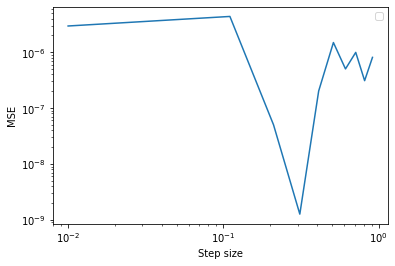

In [72]:
plt.plot(step_sizes, e_std)
plt.xlabel("Step size")
plt.ylabel("MSE")
plt.xscale('log')
plt.yscale('log')
plt.legend()